510
['business' 'entertainment' 'politics' 'sport' 'tech']
[510 386 417 511 401]


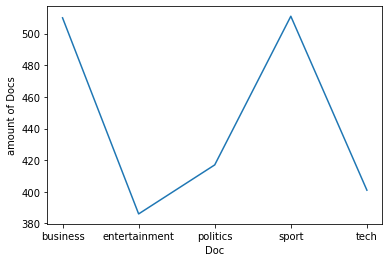

In [1]:
import matplotlib.pyplot as plt
import os, os.path
import numpy as np

dir = './BBC/business'
list = os.listdir(dir) # dir is your directory path
number_files = len(list)
print(len(os.listdir(dir)))

amountOfTimes = np.array(['business','entertainment','politics','sport','tech'])
arrayOfDocs = np.array([
len(os.listdir('./BBC/business')),
len(os.listdir('./BBC/entertainment')),
len(os.listdir('./BBC/politics')),
len(os.listdir('./BBC/sport')),
len(os.listdir('./BBC/tech'))
])

print(amountOfTimes)
print(arrayOfDocs)

plt.plot(amountOfTimes,arrayOfDocs)
plt.xlabel('Doc')
plt.ylabel('amount of Docs')
plt.savefig('BBC-distribution.pdf')

In [3]:
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import os
import pandas as pd
import csv
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import accuracy_score
import re
import os
import sys
import os.path
import fnmatch
import collections
import math

data = load_files('./BBC',encoding='latin1')
textData, classes = data.data, data.target

#y is the value of the class at that index
#0 = business
#1 = entertainment
#2 = politics
#3 = sport
#4 = tech

vectorizer = CountVectorizer()

lab = vectorizer.fit_transform(textData)
data_matrix = lab.toarray()

counts = pd.DataFrame(data_matrix, columns=vectorizer.get_feature_names())

x_train, x_test, y_train, y_test = train_test_split(data_matrix, classes, test_size=0.2, train_size = 0.8,random_state=None)
naive_bayes = MultinomialNB()
naive_bayes.fit(x_train, y_train)

prediction =  naive_bayes.predict(x_test) #predict the class given counts for token x

#MultinomialNB default values, try1

pipeline_filename_writer = open("./bbc-performance.txt","wb")
pipeline_filename_writer.write('(a) *********** MultinomialNB default values, try1 **********'.encode())
# pipeline_filename_writer.close()

#b confusion matrix
confusion_m = confusion_matrix(y_test, prediction)
pipeline_filename_writer.write('\n(b)\n'.encode())
pipeline_filename_writer.write(str(confusion_m).encode())

#c precision report
report = classification_report(y_test, prediction)
pipeline_filename_writer.write('\n(c)\n'.encode())
pipeline_filename_writer.write(report.encode())

#d average accuracy scoress
accuracy = accuracy_score(y_test, prediction)
pipeline_filename_writer.write('\n(d)\n '.encode())
pipeline_filename_writer.write(str(accuracy).encode())

#e
def classPercentage(classIndex):
    return len([number for number in classes if number == classIndex])

pipeline_filename_writer.write('\n(e)\n'.encode())
pipeline_filename_writer.write('\nBusiness words percentage:'.encode())
pipeline_filename_writer.write(str(classPercentage(0)).encode())
pipeline_filename_writer.write('\nEntertainment words percentage:'.encode())
pipeline_filename_writer.write(str(classPercentage(1)).encode())
pipeline_filename_writer.write('\nPolitics words percentage:'.encode())
pipeline_filename_writer.write(str(classPercentage(2)).encode())
pipeline_filename_writer.write('\nSports words percentage:'.encode())
pipeline_filename_writer.write(str(classPercentage(3)).encode())
pipeline_filename_writer.write('\nTech words percentage:'.encode())
pipeline_filename_writer.write(str(classPercentage(4)).encode())

#f vocabular size
number_of_words = len(vectorizer.get_feature_names())
pipeline_filename_writer.write('\n(f)\n'.encode())
pipeline_filename_writer.write(str(number_of_words).encode())

#g
def _sum(arr): 
    sum=0
    for i in arr:
        sum = sum + i 
    return(sum) 

def numberOfWordsInClass(classIndex,data_matrix):
    counter = 0
    zeroCounter = 0
    newMatrixArray = [0] * len(data_matrix[0])
    for (index,c) in enumerate(classes):
        if c == classIndex:            
            for (indexInClass,occurences) in enumerate(data_matrix[index]):
                counter = counter + occurences
                newMatrixArray[indexInClass] = newMatrixArray[indexInClass] + occurences
        else:
            for (indexInClass,occurences) in enumerate(data_matrix[index]):
                counter = counter + occurences

    d = dict();
    d['counter'] = sum(newMatrixArray) #how many words that class has
    d['classPercentage'] = (sum(newMatrixArray)*100)/counter
    d['zeroWordsCounter'] = len([number for number in newMatrixArray if number == 0])#number of words that occur 0times in that class
    d['percentage'] = (d['zeroWordsCounter']/(len(newMatrixArray)))*100
    return d

businessWords = numberOfWordsInClass(0,data_matrix)
entertainmentWords = numberOfWordsInClass(1,data_matrix)
politicsWords = numberOfWordsInClass(2,data_matrix)
sportWords = numberOfWordsInClass(3,data_matrix)
techWords = numberOfWordsInClass(4,data_matrix)

pipeline_filename_writer.write('\n(g)\n'.encode())
pipeline_filename_writer.write('\nBusiness words:'.encode())
pipeline_filename_writer.write(str(businessWords['counter']).encode())
pipeline_filename_writer.write('\nEntertainment words:'.encode())
pipeline_filename_writer.write(str(entertainmentWords['counter']).encode())
pipeline_filename_writer.write('\nPolitics words:'.encode())
pipeline_filename_writer.write(str(politicsWords['counter']).encode())
pipeline_filename_writer.write('\nSports words:'.encode())
pipeline_filename_writer.write(str(sportWords['counter']).encode())
pipeline_filename_writer.write('\nTech words:'.encode())
pipeline_filename_writer.write(str(techWords['counter']).encode())
    
#h        

totalWords = businessWords['counter'] + entertainmentWords['counter'] + politicsWords['counter'] + sportWords['counter'] + techWords['counter']
pipeline_filename_writer.write('\n(h)\n'.encode())
pipeline_filename_writer.write(str(totalWords).encode())

#i
pipeline_filename_writer.write('\n(i)\n'.encode())
pipeline_filename_writer.write('\nBusiness zero words percentage:'.encode())
pipeline_filename_writer.write(str(businessWords['percentage']).encode())
pipeline_filename_writer.write('\nEntertainment zero words percentage:'.encode())
pipeline_filename_writer.write(str(entertainmentWords['percentage']).encode())
pipeline_filename_writer.write('\nPolitics zero words percentage:'.encode())
pipeline_filename_writer.write(str(politicsWords['percentage']).encode())
pipeline_filename_writer.write('\nSports zero words percentage:'.encode())
pipeline_filename_writer.write(str(sportWords['percentage']).encode())
pipeline_filename_writer.write('\nTech zero words percentage:'.encode())
pipeline_filename_writer.write(str(techWords['percentage']).encode())

#j total zero percentage
def numberOfOneWordsInCorpus(data_matrix):
    newMatrixArray = [0] * len(data_matrix[0])
    totalCount = 0
    for (index,c) in enumerate(classes):
        for (indexInClass,occurences) in enumerate(data_matrix[index]):
            totalCount = totalCount + occurences
            if(newMatrixArray[indexInClass]==0):
                newMatrixArray[indexInClass] = 1
    return (len([number for number in newMatrixArray if number == 1])*100)/totalCount#number of words that occur 0times in that class

totalOnePercentage = (numberOfOneWordsInCorpus(data_matrix))

pipeline_filename_writer.write('\n(j)\n'.encode())
pipeline_filename_writer.write(str(totalOnePercentage).encode())


#k favorite words hockey & football
def numberOfSpecificWord(wordIndex):
    counter = 0
    for arr in data_matrix:
        counter = counter + arr[wordIndex]
            
    return counter

hockeyIndex = vectorizer.get_feature_names().index('hockey')
footballIndex = vectorizer.get_feature_names().index('football')

hockeyPercent = numberOfSpecificWord(hockeyIndex)/len(data_matrix[0])
hockeyIndexCount = (-1)*hockeyPercent*math.log(hockeyPercent)

footballPercent = numberOfSpecificWord(footballIndex)/len(data_matrix[0])
footballIndexCount = (-1)*footballPercent*math.log(footballPercent)

pipeline_filename_writer.write('\n(k)\n'.encode())
pipeline_filename_writer.write('Hockey:'.encode())
pipeline_filename_writer.write(str(hockeyIndexCount).encode())
pipeline_filename_writer.write('\nFootball:'.encode())
pipeline_filename_writer.write(str(footballIndexCount).encode())
pipeline_filename_writer.close()
print('done')


done


In [4]:
pipeline_filename_writer = open("./bbc-performance.txt","ab")

pipeline_filename_writer.write('*********** MultinomialNB default values, try2 **********'.encode())


#b confusion matrix
confusion_m = confusion_matrix(y_test, prediction)
pipeline_filename_writer.write('\n(b)\n'.encode())
pipeline_filename_writer.write(str(confusion_m).encode())

#c precision report
report = classification_report(y_test, prediction)
pipeline_filename_writer.write('\n(c)\n'.encode())
pipeline_filename_writer.write(report.encode())

#d average accuracy scoress
accuracy = accuracy_score(y_test, prediction)
pipeline_filename_writer.write('\n(d)\n '.encode())
pipeline_filename_writer.write(str(accuracy).encode())

#e
def classPercentage(classIndex):
    return len([number for number in classes if number == classIndex])

pipeline_filename_writer.write('\n(e)\n'.encode())
pipeline_filename_writer.write('\nBusiness words percentage:'.encode())
pipeline_filename_writer.write(str(classPercentage(0)).encode())
pipeline_filename_writer.write('\nEntertainment words percentage:'.encode())
pipeline_filename_writer.write(str(classPercentage(1)).encode())
pipeline_filename_writer.write('\nPolitics words percentage:'.encode())
pipeline_filename_writer.write(str(classPercentage(2)).encode())
pipeline_filename_writer.write('\nSports words percentage:'.encode())
pipeline_filename_writer.write(str(classPercentage(3)).encode())
pipeline_filename_writer.write('\nTech words percentage:'.encode())
pipeline_filename_writer.write(str(classPercentage(4)).encode())

#f vocabular size
number_of_words = len(vectorizer.get_feature_names())
pipeline_filename_writer.write('\n(f)\n'.encode())
pipeline_filename_writer.write(str(number_of_words).encode())


#g
def _sum(arr): 
    sum=0
    for i in arr:
        sum = sum + i 
    return(sum) 

def numberOfWordsInClass(classIndex,data_matrix):
    counter = 0
    zeroCounter = 0
    newMatrixArray = [0] * len(data_matrix[0])
    for (index,c) in enumerate(classes):
        if c == classIndex:            
            for (indexInClass,occurences) in enumerate(data_matrix[index]):
                counter = counter + occurences
                newMatrixArray[indexInClass] = newMatrixArray[indexInClass] + occurences
        else:
            for (indexInClass,occurences) in enumerate(data_matrix[index]):
                counter = counter + occurences

    d = dict();
    d['counter'] = sum(newMatrixArray) #how many words that class has
    d['classPercentage'] = (sum(newMatrixArray)*100)/counter
    d['zeroWordsCounter'] = len([number for number in newMatrixArray if number == 0])#number of words that occur 0times in that class
    d['percentage'] = (d['zeroWordsCounter']/(len(newMatrixArray)))*100
    return d
        
businessWords = numberOfWordsInClass(0,data_matrix)
entertainmentWords = numberOfWordsInClass(1,data_matrix)
politicsWords = numberOfWordsInClass(2,data_matrix)
sportWords = numberOfWordsInClass(3,data_matrix)
techWords = numberOfWordsInClass(4,data_matrix)

pipeline_filename_writer.write('\n(g)\n'.encode())
pipeline_filename_writer.write('\nBusiness words:'.encode())
pipeline_filename_writer.write(str(businessWords['counter']).encode())
pipeline_filename_writer.write('\nEntertainment words:'.encode())
pipeline_filename_writer.write(str(entertainmentWords['counter']).encode())
pipeline_filename_writer.write('\nPolitics words:'.encode())
pipeline_filename_writer.write(str(politicsWords['counter']).encode())
pipeline_filename_writer.write('\nSports words:'.encode())
pipeline_filename_writer.write(str(sportWords['counter']).encode())
pipeline_filename_writer.write('\nTech words:'.encode())
pipeline_filename_writer.write(str(techWords['counter']).encode())
    
#h
totalWords = businessWords['counter'] + entertainmentWords['counter'] + politicsWords['counter'] + sportWords['counter'] + techWords['counter']
pipeline_filename_writer.write('\n(h)\n'.encode())
pipeline_filename_writer.write(str(totalWords).encode())

#i
pipeline_filename_writer.write('\n(i)\n'.encode())
pipeline_filename_writer.write('\nBusiness zero words percentage:'.encode())
pipeline_filename_writer.write(str(businessWords['percentage']).encode())
pipeline_filename_writer.write('\nEntertainment zero words percentage:'.encode())
pipeline_filename_writer.write(str(entertainmentWords['percentage']).encode())
pipeline_filename_writer.write('\nPolitics zero words percentage:'.encode())
pipeline_filename_writer.write(str(politicsWords['percentage']).encode())
pipeline_filename_writer.write('\nSports zero words percentage:'.encode())
pipeline_filename_writer.write(str(sportWords['percentage']).encode())
pipeline_filename_writer.write('\nTech zero words percentage:'.encode())
pipeline_filename_writer.write(str(techWords['percentage']).encode())

#j total zero percentage
def numberOfOneWordsInCorpus(data_matrix):
    newMatrixArray = [0] * len(data_matrix[0])
    totalCount = 0
    for (index,c) in enumerate(classes):
        for (indexInClass,occurences) in enumerate(data_matrix[index]):
            totalCount = totalCount + occurences
            if(newMatrixArray[indexInClass]==0):
                newMatrixArray[indexInClass] = 1
    return (len([number for number in newMatrixArray if number == 1])*100)/totalCount#number of words that occur 0times in that class

totalOnePercentage = (numberOfOneWordsInCorpus(data_matrix))

pipeline_filename_writer.write('\n(j)\n'.encode())
pipeline_filename_writer.write(str(totalOnePercentage).encode())


#k favorite words hockey & football
def numberOfSpecificWord(wordIndex):
    counter = 0
    for arr in data_matrix:
        counter = counter + arr[wordIndex]
            
    return counter

hockeyIndex = vectorizer.get_feature_names().index('hockey')
footballIndex = vectorizer.get_feature_names().index('football')

hockeyPercent = numberOfSpecificWord(hockeyIndex)/len(data_matrix[0])
hockeyIndexCount = (-1)*hockeyPercent*math.log(hockeyPercent)

footballPercent = numberOfSpecificWord(footballIndex)/len(data_matrix[0])
footballIndexCount = (-1)*footballPercent*math.log(footballPercent)

pipeline_filename_writer.write('\n(k)\n'.encode())
pipeline_filename_writer.write('Hockey:'.encode())
pipeline_filename_writer.write(str(hockeyIndexCount).encode())
pipeline_filename_writer.write('\nFootball:'.encode())
pipeline_filename_writer.write(str(footballIndexCount).encode())
pipeline_filename_writer.close()
print('done')

done


In [5]:
data = load_files('./BBC',encoding='latin1')
textData, classes = data.data, data.target

#y is the value of the class at that index
#0 = business
#1 = entertainment
#2 = politics
#3 = sport
#4 = tech

vectorizer = CountVectorizer()

lab = vectorizer.fit_transform(textData)
data_matrix = lab.toarray()
data_matrix_smoothed_0001 = [x+0.0001 for x in data_matrix]

counts = pd.DataFrame(data_matrix, columns=vectorizer.get_feature_names())

x_train, x_test, y_train, y_test = train_test_split(data_matrix, classes, test_size=0.2, train_size = 0.8,random_state=None)
naive_bayes = MultinomialNB(alpha=0.0001)
naive_bayes.fit(x_train, y_train)

prediction =  naive_bayes.predict(x_test) #predict the class given counts for token x

#MultinomialNB default values, try1

pipeline_filename_writer = open("./bbc-performance.txt","ab")
pipeline_filename_writer.write('(a) *********** MultinomialNB default values, try3 with 0.0001 smoothing **********'.encode())
# pipeline_filename_writer.close()

#b confusion matrix
confusion_m = confusion_matrix(y_test, prediction)
pipeline_filename_writer.write('\n(b)\n'.encode())
pipeline_filename_writer.write(str(confusion_m).encode())

#c precision report
report = classification_report(y_test, prediction)
pipeline_filename_writer.write('\n(c)\n'.encode())
pipeline_filename_writer.write(report.encode())

#d average accuracy scoress
accuracy = accuracy_score(y_test, prediction)
pipeline_filename_writer.write('\n(d)\n '.encode())
pipeline_filename_writer.write(str(accuracy).encode())

#e
def classPercentage(classIndex):
    return len([number for number in classes if number == classIndex])

pipeline_filename_writer.write('\n(e)\n'.encode())
pipeline_filename_writer.write('\nBusiness words percentage:'.encode())
pipeline_filename_writer.write(str(classPercentage(0)).encode())
pipeline_filename_writer.write('\nEntertainment words percentage:'.encode())
pipeline_filename_writer.write(str(classPercentage(1)).encode())
pipeline_filename_writer.write('\nPolitics words percentage:'.encode())
pipeline_filename_writer.write(str(classPercentage(2)).encode())
pipeline_filename_writer.write('\nSports words percentage:'.encode())
pipeline_filename_writer.write(str(classPercentage(3)).encode())
pipeline_filename_writer.write('\nTech words percentage:'.encode())
pipeline_filename_writer.write(str(classPercentage(4)).encode())

#f vocabular size
totalItemsSmoothed = len(vectorizer.get_feature_names())+ (len(vectorizer.get_feature_names())*0.0001)
pipeline_filename_writer.write('\n(f)\n'.encode())
pipeline_filename_writer.write(str(totalItemsSmoothed).encode())

#g
def _sum(arr): 
    sum=0
    for i in arr:
        sum = sum + i 
    return(sum) 

def numberOfWordsInClass(classIndex,data_matrix,totalWithSmoothed):
    counter = 0
    zeroCounter = 0
    newMatrixArray = [0] * len(data_matrix[0])
    for (index,c) in enumerate(classes):
        if c == classIndex:            
            for (indexInClass,occurences) in enumerate(data_matrix[index]):
                counter = counter + occurences
                newMatrixArray[indexInClass] = newMatrixArray[indexInClass] + occurences
        else:
            for (indexInClass,occurences) in enumerate(data_matrix[index]):
                counter = counter + occurences

    d = dict();
    d['counter'] = sum(newMatrixArray) #how many words that class has
    d['classPercentage'] = (sum(newMatrixArray)*100)/totalItemsSmoothed
    d['zeroWordsCounter'] = len([number for number in newMatrixArray if number == 0])#number of words that occur 0times in that class
    d['percentage'] = (d['zeroWordsCounter']/(totalWithSmoothed))*100
    return d

businessWords = numberOfWordsInClass(0,data_matrix_smoothed_0001,totalItemsSmoothed)
entertainmentWords = numberOfWordsInClass(1,data_matrix_smoothed_0001,totalItemsSmoothed)
politicsWords = numberOfWordsInClass(2,data_matrix_smoothed_0001,totalItemsSmoothed)
sportWords = numberOfWordsInClass(3,data_matrix_smoothed_0001,totalItemsSmoothed)
techWords = numberOfWordsInClass(4,data_matrix_smoothed_0001,totalItemsSmoothed)

pipeline_filename_writer.write('\n(g)\n'.encode())
pipeline_filename_writer.write('\nBusiness words:'.encode())
pipeline_filename_writer.write(str(businessWords['counter']).encode())
pipeline_filename_writer.write('\nEntertainment words:'.encode())
pipeline_filename_writer.write(str(entertainmentWords['counter']).encode())
pipeline_filename_writer.write('\nPolitics words:'.encode())
pipeline_filename_writer.write(str(politicsWords['counter']).encode())
pipeline_filename_writer.write('\nSports words:'.encode())
pipeline_filename_writer.write(str(sportWords['counter']).encode())
pipeline_filename_writer.write('\nTech words:'.encode())
pipeline_filename_writer.write(str(techWords['counter']).encode())
    
#h      
totalWords = businessWords['counter'] + entertainmentWords['counter'] + politicsWords['counter'] + sportWords['counter'] + techWords['counter']
pipeline_filename_writer.write('\n(h)\n'.encode())
pipeline_filename_writer.write(str(totalWords).encode())

#i
pipeline_filename_writer.write('\n(i)\n'.encode())
pipeline_filename_writer.write('\nBusiness zero words percentage:'.encode())
pipeline_filename_writer.write(str(businessWords['percentage']).encode())
pipeline_filename_writer.write('\nEntertainment zero words percentage:'.encode())
pipeline_filename_writer.write(str(entertainmentWords['percentage']).encode())
pipeline_filename_writer.write('\nPolitics zero words percentage:'.encode())
pipeline_filename_writer.write(str(politicsWords['percentage']).encode())
pipeline_filename_writer.write('\nSports zero words percentage:'.encode())
pipeline_filename_writer.write(str(sportWords['percentage']).encode())
pipeline_filename_writer.write('\nTech zero words percentage:'.encode())
pipeline_filename_writer.write(str(techWords['percentage']).encode())

#j total zero percentage
def numberOfOneWordsInCorpus(data_matrix):
    newMatrixArray = [0] * len(data_matrix[0])
    totalCount = 0
    for (index,c) in enumerate(classes):
        for (indexInClass,occurences) in enumerate(data_matrix[index]):
            totalCount = totalCount + occurences
            if(newMatrixArray[indexInClass]==0):
                newMatrixArray[indexInClass] = 1
    return (len([number for number in newMatrixArray if number == 1])*100)/totalCount#number of words that occur 0times in that class

totalOnePercentage = (numberOfOneWordsInCorpus(data_matrix_smoothed_0001))

pipeline_filename_writer.write('\n(j)\n'.encode())
pipeline_filename_writer.write(str(totalOnePercentage).encode())


#k favorite words hockey & football
def numberOfSpecificWord(wordIndex,data_matrix):
    counter = 0
    for arr in data_matrix:
        counter = counter + arr[wordIndex]
            
    return counter

hockeyIndex = vectorizer.get_feature_names().index('hockey')
footballIndex = vectorizer.get_feature_names().index('football')

hockeyPercent = numberOfSpecificWord(hockeyIndex,data_matrix_smoothed_0001)/len(data_matrix[0])
hockeyIndexCount = (-1)*hockeyPercent*math.log(hockeyPercent)

footballPercent = numberOfSpecificWord(footballIndex,data_matrix_smoothed_0001)/len(data_matrix[0])
footballIndexCount = (-1)*footballPercent*math.log(footballPercent)

pipeline_filename_writer.write('\n(k)\n'.encode())
pipeline_filename_writer.write('Hockey:'.encode())
pipeline_filename_writer.write(str(hockeyIndexCount).encode())
pipeline_filename_writer.write('\nFootball:'.encode())
pipeline_filename_writer.write(str(footballIndexCount).encode())
pipeline_filename_writer.close()
print('done')

done


In [6]:

data = load_files('./BBC',encoding='latin1')
textData, classes = data.data, data.target

#y is the value of the class at that index
#0 = business
#1 = entertainment
#2 = politics
#3 = sport
#4 = tech

vectorizer = CountVectorizer()

lab = vectorizer.fit_transform(textData)
data_matrix = lab.toarray()
data_matrix_smoothed_9 = [x+0.9 for x in data_matrix]

counts = pd.DataFrame(data_matrix, columns=vectorizer.get_feature_names())

x_train, x_test, y_train, y_test = train_test_split(data_matrix, classes, test_size=0.2, train_size = 0.8,random_state=None)
print('done')
naive_bayes = MultinomialNB(alpha=0.9)
naive_bayes.fit(x_train, y_train)

prediction =  naive_bayes.predict(x_test) #predict the class given counts for token x

#MultinomialNB default values, try1

pipeline_filename_writer = open("./bbc-performance.txt","ab")
pipeline_filename_writer.write('(a) *********** MultinomialNB default values, try4 with 0.9 smoothing **********'.encode())
# pipeline_filename_writer.close()

#b confusion matrix
confusion_m = confusion_matrix(y_test, prediction)
pipeline_filename_writer.write('\n(b)\n'.encode())
pipeline_filename_writer.write(str(confusion_m).encode())

#c precision report
report = classification_report(y_test, prediction)
pipeline_filename_writer.write('\n(c)\n'.encode())
pipeline_filename_writer.write(report.encode())

#d average accuracy scoress
accuracy = accuracy_score(y_test, prediction)
pipeline_filename_writer.write('\n(d)\n '.encode())
pipeline_filename_writer.write(str(accuracy).encode())
print(accuracy)

#e

def classPercentage(classIndex):
    return len([number for number in classes if number == classIndex])

pipeline_filename_writer.write('\n(e)\n'.encode())
pipeline_filename_writer.write('\nBusiness words percentage:'.encode())
pipeline_filename_writer.write(str(classPercentage(0)).encode())
pipeline_filename_writer.write('\nEntertainment words percentage:'.encode())
pipeline_filename_writer.write(str(classPercentage(1)).encode())
pipeline_filename_writer.write('\nPolitics words percentage:'.encode())
pipeline_filename_writer.write(str(classPercentage(2)).encode())
pipeline_filename_writer.write('\nSports words percentage:'.encode())
pipeline_filename_writer.write(str(classPercentage(3)).encode())
pipeline_filename_writer.write('\nTech words percentage:'.encode())
pipeline_filename_writer.write(str(classPercentage(4)).encode())

#f vocabular size
totalItemsSmoothed = len(vectorizer.get_feature_names())+ (len(vectorizer.get_feature_names())*0.9)
pipeline_filename_writer.write('\n(f)\n'.encode())
pipeline_filename_writer.write(str(totalItemsSmoothed).encode())

#g
def _sum(arr): 
    sum=0
    for i in arr:
        sum = sum + i 
    return(sum) 

def numberOfWordsInClass(classIndex,data_matrix,totalItemsSmoothed):
    counter = 0
    zeroCounter = 0
    newMatrixArray = [0] * len(data_matrix[0])
    for (index,c) in enumerate(classes):
        if c == classIndex:            
            for (indexInClass,occurences) in enumerate(data_matrix[index]):
                counter = counter + occurences
                newMatrixArray[indexInClass] = newMatrixArray[indexInClass] + occurences
        else:
            for (indexInClass,occurences) in enumerate(data_matrix[index]):
                counter = counter + occurences

    d = dict();
    d['counter'] = sum(newMatrixArray) #how many words that class has
    d['classPercentage'] = (sum(newMatrixArray)*100)/totalItemsSmoothed
    d['zeroWordsCounter'] = len([number for number in newMatrixArray if number == 0])#number of words that occur 0times in that class
    d['percentage'] = (d['zeroWordsCounter']/(totalItemsSmoothed))*100
    return d
        
businessWords = numberOfWordsInClass(0,data_matrix_smoothed_9,totalItemsSmoothed)
entertainmentWords = numberOfWordsInClass(1,data_matrix_smoothed_9,totalItemsSmoothed)
politicsWords = numberOfWordsInClass(2,data_matrix_smoothed_9,totalItemsSmoothed)
sportWords = numberOfWordsInClass(3,data_matrix_smoothed_9,totalItemsSmoothed)
techWords = numberOfWordsInClass(4,data_matrix_smoothed_9,totalItemsSmoothed)

pipeline_filename_writer.write('\n(g)\n'.encode())
pipeline_filename_writer.write('\nBusiness words:'.encode())
pipeline_filename_writer.write(str(businessWords['counter']).encode())
pipeline_filename_writer.write('\nEntertainment words:'.encode())
pipeline_filename_writer.write(str(entertainmentWords['counter']).encode())
pipeline_filename_writer.write('\nPolitics words:'.encode())
pipeline_filename_writer.write(str(politicsWords['counter']).encode())
pipeline_filename_writer.write('\nSports words:'.encode())
pipeline_filename_writer.write(str(sportWords['counter']).encode())
pipeline_filename_writer.write('\nTech words:'.encode())
pipeline_filename_writer.write(str(techWords['counter']).encode())
    
#h
totalWords = businessWords['counter'] + entertainmentWords['counter'] + politicsWords['counter'] + sportWords['counter'] + techWords['counter']
pipeline_filename_writer.write('\n(h)\n'.encode())
pipeline_filename_writer.write(str(totalWords).encode())

#i
pipeline_filename_writer.write('\n(i)\n'.encode())
pipeline_filename_writer.write('\nBusiness zero words percentage:'.encode())
pipeline_filename_writer.write(str(businessWords['percentage']).encode())
pipeline_filename_writer.write('\nEntertainment zero words percentage:'.encode())
pipeline_filename_writer.write(str(entertainmentWords['percentage']).encode())
pipeline_filename_writer.write('\nPolitics zero words percentage:'.encode())
pipeline_filename_writer.write(str(politicsWords['percentage']).encode())
pipeline_filename_writer.write('\nSports zero words percentage:'.encode())
pipeline_filename_writer.write(str(sportWords['percentage']).encode())
pipeline_filename_writer.write('\nTech zero words percentage:'.encode())
pipeline_filename_writer.write(str(techWords['percentage']).encode())

#j total zero percentage
def numberOfOneWordsInCorpus(data_matrix):
    newMatrixArray = [0] * len(data_matrix[0])
    totalCount = 0
    for (index,c) in enumerate(classes):
        for (indexInClass,occurences) in enumerate(data_matrix[index]):
            totalCount = totalCount + occurences
            if(newMatrixArray[indexInClass]==0):
                newMatrixArray[indexInClass] = 1
    return (len([number for number in newMatrixArray if number == 1])*100)/totalCount#number of words that occur 0times in that class

totalOnePercentage = (numberOfOneWordsInCorpus(data_matrix_smoothed_9))

pipeline_filename_writer.write('\n(j)\n'.encode())
pipeline_filename_writer.write(str(totalOnePercentage).encode())


#k favorite words hockey & football
def numberOfSpecificWord(wordIndex,data_matrix):
    counter = 0
    for arr in data_matrix:
        counter = counter + arr[wordIndex]      
    return counter

hockeyIndex = vectorizer.get_feature_names().index('hockey')
footballIndex = vectorizer.get_feature_names().index('football')

hockeyPercent = numberOfSpecificWord(hockeyIndex,data_matrix_smoothed_9)/len(data_matrix[0])
hockeyIndexCount = (-1)*hockeyPercent*math.log(hockeyPercent)

footballPercent = numberOfSpecificWord(footballIndex,data_matrix_smoothed_9)/len(data_matrix[0])
footballIndexCount = (-1)*footballPercent*math.log(footballPercent)

pipeline_filename_writer.write('\n(k)\n'.encode())
pipeline_filename_writer.write('Hockey:'.encode())
pipeline_filename_writer.write(str(hockeyIndexCount).encode())
pipeline_filename_writer.write('\nFootball:'.encode())
pipeline_filename_writer.write(str(footballIndexCount).encode())
pipeline_filename_writer.close()
print('done')

done
0.9730337078651685
done


In [8]:
pipeline_filename_writer = open("./bbc-discussion.txt","wb")
pipeline_filename_writer.write('The performance of steps 8 - 10 are better in terms of accuracy due to the fact that we are adding smothing. Smoothing is extrmeely necessary in this context due to the fact that most documents ahve a count of zero'.encode())
pipeline_filename_writer.close()